In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/speical project/Copy of Fake.csv") # Change to the actual file name
print(df.head()) # To display the first few rows


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/speical project/Copy of True.csv") # Change to the actual file name
print(df.head()) # To display the first few rows


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string

# Load datasets
data_fake = pd.read_csv("/content/drive/MyDrive/speical project/Copy of Fake.csv")
data_true = pd.read_csv("/content/drive/MyDrive/speical project/Copy of True.csv")


In [ ]:

data_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Add 'class' column to both datasets
data_fake['class'] = 0
data_true['class'] = 1

# Checking the shape of the datasets
data_fake.shape, data_true.shape

# Manual testing data for fake and true news
data_fake_manual_testing = data_fake.tail(10)
data_fake.drop(data_fake.index[-10:], axis=0, inplace=True)

data_true_manual_testing = data_true.tail(10)
data_true.drop(data_true.index[-10:], axis=0, inplace=True)

# Checking the shape of the datasets after dropping the last 10 rows
data_fake.shape, data_true.shape


((23471, 5), (21407, 5))

In [ ]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1


<ipython-input-8-90008d39c97b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
<ipython-input-8-90008d39c97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
data_merge = pd.concat([data_fake, data_true], axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data_merge.columns

data = data_merge.drop(['title', 'subject', 'date'], axis=1)
data.isnull().sum()


,0
text,0
class,0


In [ ]:
data = data.sample(frac=1)
data.head()

,text,class
12747,KABUL/JAKARTA (Reuters) - Thousands of protest...,1
321,A backlash of epic proportions ensued after Do...,0
8175,Eric Garner s daughter has released a new vide...,0
17704,CANBERRA (Reuters) - Australia s High Court sa...,1
8108,It really seems as if Republicans don t think ...,0


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)


In [ ]:
data.columns
data.head()

,text,class
0,KABUL/JAKARTA (Reuters) - Thousands of protest...,1
1,A backlash of epic proportions ensued after Do...,0
2,Eric Garner s daughter has released a new vide...,0
3,CANBERRA (Reuters) - Australia s High Court sa...,1
4,It really seems as if Republicans don t think ...,0


<ipython-input-19-3c04293c9f8b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data_merge, palette='Set2')


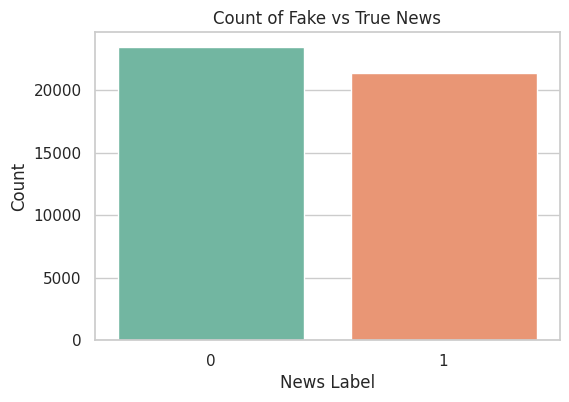

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot the count of each label
# Use 'class' instead of 'label' as the column name
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data_merge, palette='Set2')
plt.title("Count of Fake vs True News")
plt.xlabel("News Label")
plt.ylabel("Count")
plt.show()

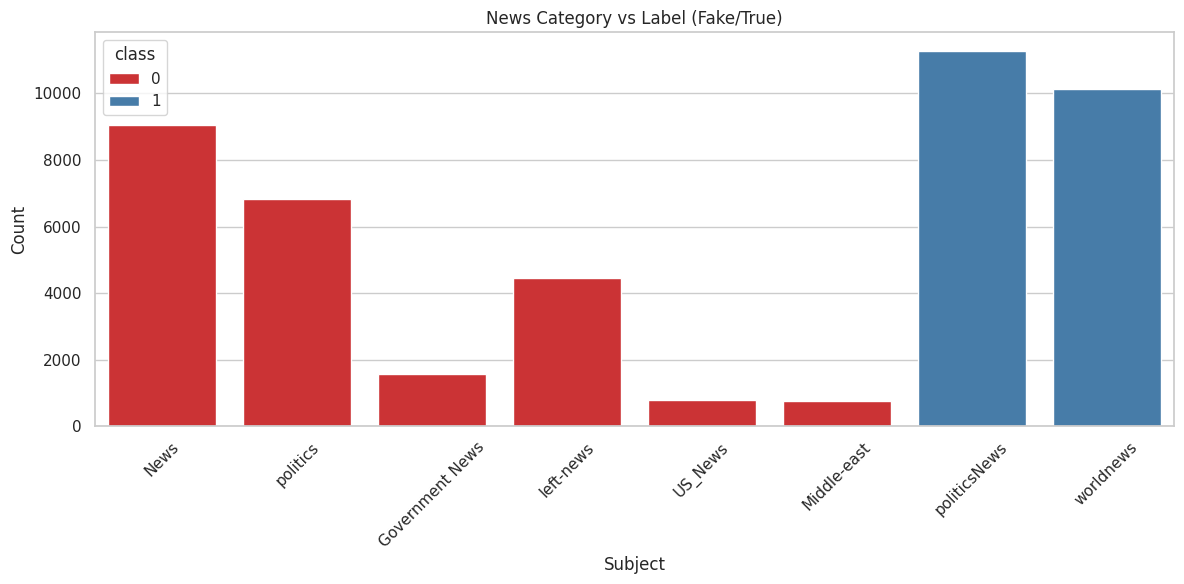

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_merge, x='subject', hue='class', palette='Set1') # Change 'label' to 'class'
plt.title("News Category vs Label (Fake/True)")
plt.xticks(rotation=45)
plt.xlabel("Subject")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
import re
import string

def wordopt(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove text inside square brackets (e.g., [some text])
    text = re.sub('\[.*?\]', '', text)

    # Replace non-word characters with a space
    text = re.sub("\W", " ", text)

    # Remove URLs (http, https, and www links)
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove words that contain digits
    text = re.sub('\w*\d\w*', '', text)

    return text


In [ ]:
data['text'] = data['text'].apply(wordopt)




In [ ]:
x = data['text']
y = data['class']



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)



In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)


LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9863636363636363

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
DT = DecisionTreeClassifier()

# Fit the model with training data
DT.fit(xv_train, y_train)

# Predict using the test data
pred_dt = DT.predict(xv_test)

# Get the accuracy score of the model
accuracy = DT.score(xv_test, y_test)

# Optionally, print the accuracy score or prediction results
print("Accuracy: ", accuracy)



Accuracy:  0.996078431372549


In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5870
           1       0.98      0.99      0.99      5350

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)




GradientBoostingClassifier(random_state=0)

In [ ]:
# Make predictions on the test set
pred_gb = GB.predict(xv_test)



In [ ]:
# Evaluate model accuracy
print("Accuracy:", GB.score(xv_test, y_test))



Accuracy: 0.9947415329768271


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, pred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5870
           1       0.99      1.00      0.99      5350

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)



RandomForestClassifier(random_state=0)

In [ ]:
# Make predictions on the test set
pred_rf = RF.predict(xv_test)



In [ ]:
# Evaluate model accuracy
RF.score(xv_test, y_test)



0.9869875222816399

In [ ]:
# Generate classification report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5870
           1       0.99      0.98      0.99      5350

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "not a Fake News"
    else:
        return "Unknown"


In [ ]:
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)

    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    predictions = {
        "LR": output_label(LR.predict(new_xv_test)[0]),
        "DT": output_label(DT.predict(new_xv_test)[0]),
        "GBC": output_label(GB.predict(new_xv_test)[0]),
        "RFC": output_label(RF.predict(new_xv_test)[0])
    }

    for model, result in predictions.items():
        print(f"{model} Prediction: {result}")

    return predictions


In [ ]:
news = str(input("Enter the news text: "))
manual_testing(news)

Enter the news text: Delhi Capitals will aim to return to winning ways in the match against Kolkata Knight Riders. The Axar Patel-led side had suffered a six-wicket loss to Royal Challengers Bengaluru on Sunday, which was only their third loss this season. Delhi Capitals are currently in fourth place with 12 points from nine matches.  Kolkata Knight Riders, on the other hand, are in seventh place with seven points from nine matches and will need to win every match from now to have any hopes of qualifying for the playoffs.
LR Prediction: Fake News
DT Prediction: Fake News
GBC Prediction: Fake News
RFC Prediction: not a Fake News


{'LR': 'Fake News',
 'DT': 'Fake News',
 'GBC': 'Fake News',
 'RFC': 'not a Fake News'}